## Image Classification

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Load dataset (CIFAR-10)

In [18]:
dataset = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = dataset.load_data()
img_path = r"img/dog.jpg"
image = cv2.imread(img_path)
image_resized = cv2.resize(image, (64, 64))
image_normalized = image_resized / 255.0

### Normail Pixel Values (0 to 1)

In [19]:
x_train = np.array([cv2.resize(img, (64, 64)) for img in x_train])
x_test = np.array([cv2.resize(img, (64, 64)) for img in x_test])
x_train, x_test = x_train / 255.0, x_test / 255.0

### Define and Compile the Model

In [20]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training and Save the Model

In [21]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model.save("image_classification_model.keras")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3670 - loss: 1.7361 - val_accuracy: 0.5918 - val_loss: 1.1643
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6093 - loss: 1.1182 - val_accuracy: 0.6446 - val_loss: 1.0190
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6824 - loss: 0.9079 - val_accuracy: 0.6811 - val_loss: 0.9375
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7249 - loss: 0.7861 - val_accuracy: 0.6865 - val_loss: 0.9063
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7585 - loss: 0.6925 - val_accuracy: 0.6916 - val_loss: 0.9140
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7892 - loss: 0.6019 - val_accuracy: 0.6955 - val_loss: 0.9155
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8166 - loss: 0.5233 - val_accuracy: 0.6960 - val_loss: 0.9619
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8460 -

### Evaluate Model Performance


In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.6819 - loss: 1.2194
Test accuracy: 0.6819


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Class: dog


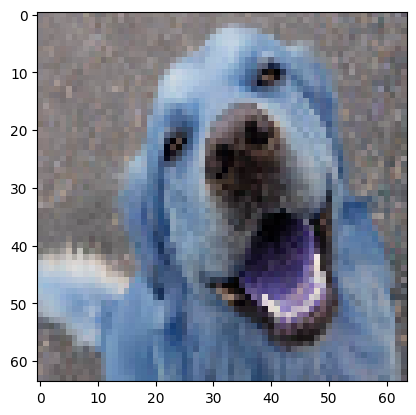

In [23]:
image_input = np.expand_dims(image_normalized, axis=0)
prediction = model.predict(image_input)
predicted_class = np.argmax(prediction)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Predicted Class: {class_names[predicted_class]}")
plt.imshow(image_resized)